# Prac 2

Note: I went through this with the class in the prac and can make no guarantees of its correctness.

## Q1 

Here we want to make a sinusoid:
    $f(x) = 2sin(1.5x)$
We will then use additive noise, N(0,1) to generate a distribution.

The distribution has an underlying deterministic element that we can fit a polynomial regrassion model to.

In [1]:
import numpy as np

In [2]:
# Quality of life function
def f(x):
    return 2*np.sin(1.5*x)

In [3]:
# Get x uniformly over the range presented in Alpaydin
x = np.linspace(0,5,100)
y = f(x)

In [4]:
import matplotlib.pyplot as plt

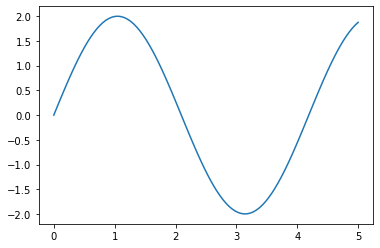

In [5]:
plt.plot(x,y)

Generate our training and validation set

In [6]:
# Sampling uniformly over the range gives stochasticity linspace doesn't have
x_train = np.random.uniform(0,5,size=20)
x_val = np.random.uniform(0,5,size=20)

In [7]:
noise_coeff = 1
y_train = f(x_train) + noise_coeff*np.random.normal(size=20)
y_val = f(x_val) + noise_coeff*np.random.normal(size=20)

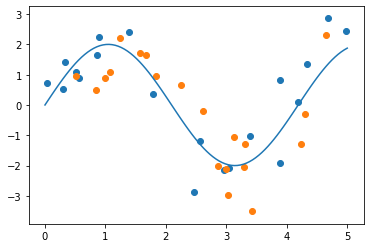

In [8]:
# Sanity check to make sure our test and train data mimic alpaydin
plt.plot(x,y)
plt.scatter(x_train,y_train)
plt.scatter(x_val, y_val)

(-5, 5)

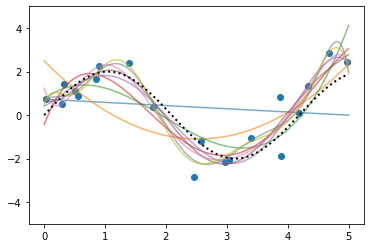

In [9]:
# Create polynomials order 1 to 9 
plt.scatter(x_train,y_train)
for i in range(1,10):
    z = np.polyfit(x_train,y_train,i)
    fun = np.poly1d(z)
    yf = fun(x)
    plt.plot(x,yf,alpha=0.6)
plt.plot(x,y,c='k',linestyle=':', linewidth=2)
plt.ylim([-5,5])

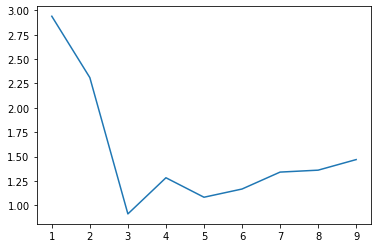

In [10]:
# Calculate the validation error
mse_list = []
for i in range(1,10):
    z = np.polyfit(x_train,y_train,i)
    fun = np.poly1d(z)
    y_pred = fun(x_val)
    y_err = y_val - y_pred
    y_err *= y_err
    mse = np.mean(y_err)
    mse_list.append(mse)
plt.plot(list(range(1,10)), mse_list)

Elbow is where you would expect based on number of turning points in underlying function.

Q2 and Q3 are similar to Q1 so I'll leave them for you to do. 

## Q4

In this question we need to split a dataset into a two class problem and then model each class as a Normal distribution which contains parameters $\mu$ and $\sigma$. The question then asks us to replicate figures 4.2 and 4.3 in Alpaydin.

To do this we split the classes in two and then calculate the parameters. We then generate and plot their respective pdfs which come from $\mathcal{N}(\mu_i,\sigma_i)$ (pdf eqution is in alpaydin/wiki).

We can then calculate the posterior by:

$P(C_i|x) = \frac{p(x|C_i)P(C_i)}{\sum_k(p(x|C_k)P(C_k))}$


We assume that $P(C_i) = 0.5$

In [23]:

class NormalPdf:
    def __init__(self,mu, std):
        self.mu = mu
        self.std = std
        
    def __call__(self,x):
        diff = (x - self.mu)*(x-self.mu)
        back_part = np.exp(-(diff/(2*self.std*self.std)))
        front_part = 1/(np.sqrt(2*np.pi)*self.std)
        return front_part*back_part

def generate_norm(data, labels, label):
    c = data[labels==label]
    mean = np.mean(c)
    std = np.std(c)
    return NormalPdf(mean, std)

def PPC(data, labels):
    uniques = np.unique(labels)
    assert len(uniques) == 2, 'labels are no good'
    norm1 = generate_norm(data, labels, uniques[0])
    norm2 = generate_norm(data, labels, uniques[1])
    x = np.linspace(np.min(data)-4, np.max(data)+4, 500)
    plt.plot(x, norm1(x))
    plt.plot(x, norm2(x))
    plt.xlabel('x')
    plt.ylabel(r'$p(x|C_i)$')
    #assume equal priors
    post1num = norm1(x)*0.5
    post2num = norm2(x)*0.5
    denom = post1num + post2num
    post1 = post1num/denom
    post2 = post2num/denom
    plt.figure()
    plt.plot(x, post1)
    plt.plot(x, post2)
    plt.xlabel('x')
    plt.ylabel(r'$P(C_i|x)$')
      
    

In [24]:
import pandas

In [25]:
# pandas is a convenient way of reading files
df= pandas.read_csv('iris.txt', header=None)

In [26]:
# Get rid of the third vlass
df = df[df[4]!= 'Iris-virginica']

In [27]:
data = np.array(df[0])
labels = np.array(df[4])

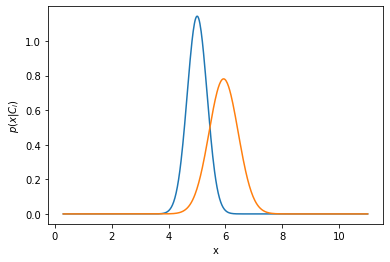

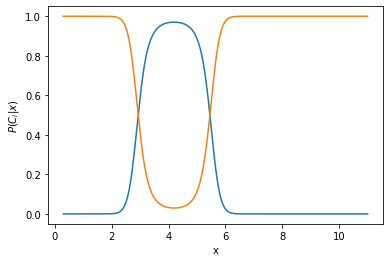

In [28]:
# generate the plots using our function
PPC(data,labels)